# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


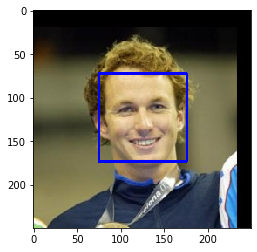

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image

#img = cv2.imread(human_files[0])
img = cv2.imread(human_files[5])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    #print("in face detector")
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    #print(len(faces) > 0)
    return len(faces) > 0

In [4]:
face_detector('lfw\Aaron_Tippin\Aaron_Tippin_0001.jpg')

True

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

#### Number of images with detected human faces in human_files_short: 96
#### Number of images with detected human faces in dog_files_short: 18

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
#print(human_files_short)


true_counts = []
#for i in range(len(human_files_short)):
for i in tqdm(range(len(human_files_short))):

    true_counts.append(face_detector(human_files_short[i]))


true_sum = sum(true_counts)
print("Number of images with detected human face in human files: {}".format(true_sum))



100%|██████████| 100/100 [00:01<00:00, 79.80it/s]


Number of images with detected human face in human files: 96


In [6]:
true_counts = []
true_sum = 0
for i in tqdm(range(len(human_files_short))):

    true_counts.append(face_detector(dog_files_short[i]))


true_sum = sum(true_counts)
print("Number of images with detected human face in dog files: {}".format(true_sum))

100%|██████████| 100/100 [00:06<00:00, 16.44it/s]


Number of images with detected human face in dog files: 18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

#print(VGG16)

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
from PIL import ImageFile

img = Image.open('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

In [9]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#Take a look at an image:
img = Image.open('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

### VGG16 input is a 224x224x3

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    transform = transforms.Compose([
        transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225])])
    
    image = Image.open(img_path)
    image = transform(image).float()
    #image = Variable(image, requires_grad = True)
    image = image.unsqueeze(0)
    # move image to GPU if CUDA is available
    if use_cuda:
        image = image.cuda()
    
    ## Return the *index* of the predicted class for that image
    
    output = VGG16(image)
    
    #print(output.shape)
    value, index = torch.max(output, 1)
    #print(value, index)
    
    sorted, indices = torch.sort(output, 1, descending = True)
    
    #print(sorted[0,:3])
    #print(indices[0,:3])

    
    return index #None # predicted class index

In [10]:
# Test VGG16_predict function
#VGG16_predict('dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00745.jpg')
#'dogImages\train\011.Australian_cattle_dog/Australian_cattle_dog_00745.jpg'
VGG16_predict('IMG_7426.jpg')


tensor([223], device='cuda:0')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    is_dog = False
    if 151 <= VGG16_predict(img_path) <= 268:
        is_dog = True        
    
    return is_dog # true/false


In [12]:
# Test dog_detector

dog_detector('IMG_7426.jpg')

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

true_counts = []
#for i in range(len(human_files_short)):
for i in tqdm(range(len(human_files_short))):

    true_counts.append(dog_detector(human_files_short[i]))


true_sum = sum(true_counts)
print("Number of images with detected dogs in human files: {}".format(true_sum))


100%|██████████| 100/100 [00:00<00:00, 121.32it/s]


Number of images with detected dogs in human files: 0


In [14]:
true_counts = []
true_sum = 0
for i in tqdm(range(len(dog_files_short))):

    true_counts.append(dog_detector(dog_files_short[i]))


true_sum = sum(true_counts)
print("Number of images with detected dogs in dog files: {}".format(true_sum))


100%|██████████| 100/100 [00:01<00:00, 71.53it/s]


Number of images with detected dogs in dog files: 94


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Based on CIFAR10_CNN exercise AND Transfer Learning Exercise:

import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


# percentage of training set to use as validation
'''valid_size = 0.2'''

# VGG-16 Takes 224x224 images as input, so we resize all of them
# convert data to a normalized torch.FloatTensor

'''data_transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    mean = [0.485, 0.456, 0.406],
                                    std = [0.229, 0.224, 0.225])
                                    ])'''

data_transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    mean = [0.485, 0.456, 0.406],
                                    std = [0.229, 0.224, 0.225])
                                ])

# choose the training and test datasets

train_dir = 'dogImages/train'
valid_dir = 'dogImages/valid'
test_dir = 'dogImages/test'

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))


Num training images:  6680
Num validation images:  835
Num test images:  836


In [16]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True) #Not sure whether shuffle necessary here

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
type(train_loader)


torch.utils.data.dataloader.DataLoader

In [17]:
# Get class names from the training folder subfolders
classes=[]
for root, dirs, files in os.walk('dogImages/train'):
    #for name in files:
        #print(os.path.join(root, name))
    for name in dirs:
        #print(os.path.join(root, name))
        #print(name)
        classes.append(name)
print(len(classes))

133


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

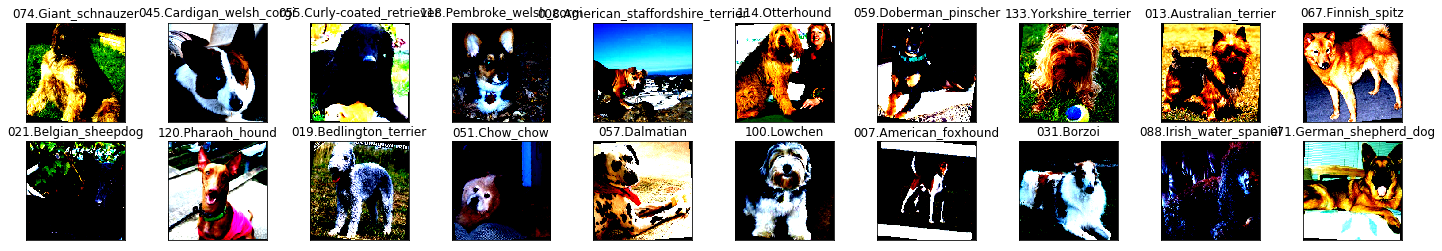

In [18]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])


In [19]:
#verify tensor shape before inputting into network
# check shape of batch of images from prior step, first dimension is the batch size
images.shape

(20, 3, 224, 224)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

#### Images resized by cropping. For input tensor size, chose 3 x 224 x 224 because that is what VGG16 will expect for RGB channels and width and height.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        #Conv2d(in_channels, out_channels, kernel size, padding = padding, stride = stride (default = 1)
        
        
        '''
        initial shape of x torch.Size([20, 3, 224, 224])
        shape after first conv and pool  torch.Size([20, 64, 112, 112])
        shape after 2nd conv and pool  torch.Size([20, 64, 56, 56])
        shape after 3rd conv and pool  torch.Size([20, 128, 28, 28])
        shape after last convolution and max pooling  torch.Size([20, 256, 14, 14])
        shape after x.view  torch.Size([80, 12544])
        final shape from network  torch.Size([80, 133])
        '''
        
        # First convolutional layer sees a 3 x 224 x 224 image       
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1)  #kernel size = 3, stride =1, padding = 1
        
        self.bn1 = nn.BatchNorm2d(64)
        
        # 2nd layer sees 64 x 112 x 112
        self.conv2 = nn.Conv2d(64, 64, 3, padding = 1)
        
        self.bn2 = nn.BatchNorm2d(64)
        
        # 3rd layer sees 64 x 56 x 56
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        
        self.bn3 = nn.BatchNorm2d(128)
        
        # 4th layer sees 128 x 28 x 28
        self.conv4 = nn.Conv2d(128, 256, 3, padding = 1)
        
        self.bn4 = nn.BatchNorm2d(256)
        
        # 5th layer sees 256 x 14 x 14 ?
        self.conv5 =nn.Conv2d(256, 512, 3, padding = 1)
        
        self.bn5 = nn.BatchNorm2d(512)
        
        self.pool = nn.MaxPool2d(2, 2)
        

        '''
        Input to the first fully connected layer has to be consistent with the output of the last pooling 
        acting on the last conv layer
        Currently that should correspond to 256 x 14 x 14
        
        Added another layer: last conv layer should now output a 512 x 7 x 7 ?
        
        '''
        hidden_1 = 500
        
        #self.fc1 = nn.Linear(256 * 14 * 14, hidden_1)
        self.fc1 = nn.Linear(512 * 7 * 7, hidden_1)
        # There are 133 classes of labeled dogs in the data set, output is therefore 133
        self.fc2 = nn.Linear(hidden_1, 133)
        
        # add a dropout layer
        self.dropout = nn.Dropout(0.25)
     
    def forward(self, x):
        ## Define forward behavior
        
        #print('initial shape of x', x.shape)
        
        x = F.relu(self.conv1(x))
        #print("shape after first conv ", x.shape)
        
        x = self.bn1(x) # batch normalization 2D
        
        x = self.pool(x)
        #print("shape after 1st pool ", x.shape)
        
        x = F.relu(self.conv2(x))       
        #print("shape after 2nd conv ", x.shape)
        x = self.pool(x)
        #print("shape after 2nd pool ", x.shape)
        
        x = self.bn2(x) # batch normalization 2D
       
        x = F.relu(self.conv3(x))       
        #print("shape after 3rd conv ", x.shape)
        x = self.pool(x)
        #print("shape after 3rd pool ", x.shape)
        
        x = self.bn3(x) # batch normalization 2D
        
        x = F.relu(self.conv4(x))       
        #print("shape after 4th conv ", x.shape)
        x = self.pool(x)
        #print("shape after 4th pool ", x.shape)
        
        x = self.bn4(x) # batch normalization 2D
        
        x = F.relu(self.conv5(x))
        #print("shape after 5th conv ", x.shape)
        x = self.pool(x)
        #print("shape after 5th pool ", x.shape)
        
        x = self.bn5(x) # batch normalization 2D
        
        # flatten image output... necessary?
        #x = x.view(-1, 256 * 14 * 14)
        x = x.view(-1, 512 * 7 * 7)
        #print("shape after x.view ", x.shape)
        # dropout
        x = self.dropout(x)
        
        x = F.relu(self.fc1(x))
        #print("shape after first fully connected layer ", x.shape)
        x = self.dropout(x)
        
        x = self.fc2(x)
        #print("shape after 2nd fully connected layer, final shape ", x.shape)    
        #print("final shape from network ", x.shape)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=500, bias=True)
  (fc2): 

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss() #None

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.005) #None lr orig 0.01

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [24]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            #print("output_shape, target.shape ", output.shape, target.shape)
            ## find the loss and update the model parameters accordingly
            # calculate the batch loss:
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
        
            
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # compute the overall loss over the complete epoch.
            train_loss += (1/(batch_idx +1)) * (loss.data - train_loss)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            # From cifar10_cnn_exercise:        
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)    
            ## update the average validation lossvalid_loss += loss.item()*data.size(0)
            valid_loss += loss.item()*data.size(0)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# MY NOTE: train the model #originally, num epochs here was 100. Start with 1 or 2 for debugging, testing, etc
# ALSO- create a dictionary for loaders_scratch
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

'''model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')'''

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.546644 	Validation Loss: 3511.471894
Validation loss decreased (inf --> 3511.471894).  Saving model ...
Epoch: 2 	Training Loss: 3.965699 	Validation Loss: 3301.666028
Validation loss decreased (3511.471894 --> 3301.666028).  Saving model ...
Epoch: 3 	Training Loss: 3.572416 	Validation Loss: 3159.455962
Validation loss decreased (3301.666028 --> 3159.455962).  Saving model ...
Epoch: 4 	Training Loss: 3.241431 	Validation Loss: 3106.168147
Validation loss decreased (3159.455962 --> 3106.168147).  Saving model ...
Epoch: 5 	Training Loss: 2.950802 	Validation Loss: 2999.431031
Validation loss decreased (3106.168147 --> 2999.431031).  Saving model ...
Epoch: 6 	Training Loss: 2.653999 	Validation Loss: 2984.852676
Validation loss decreased (2999.431031 --> 2984.852676).  Saving model ...
Epoch: 7 	Training Loss: 2.413522 	Validation Loss: 2946.089009
Validation loss decreased (2984.852676 --> 2946.089009).  Saving model ...
Epoch: 8 	Training Loss: 2.170326 	

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [28]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.214089


Test Accuracy: 24% (206/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## TODO: Specify data loaders

## Starting with transforms that worked above

data_transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    mean = [0.485, 0.456, 0.406],
                                    std = [0.229, 0.224, 0.225])
                                ])

# choose the training and test datasets, as before

train_dir = 'dogImages/train'
valid_dir = 'dogImages/valid'
test_dir = 'dogImages/test'

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats, as before
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))

Num training images:  6680
Num validation images:  835
Num test images:  836


In [21]:
# Creating the data loaders:

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True) #Not sure whether shuffle necessary here

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [22]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

## Much of the following is heavily based on the Transfer_Learning exercise 
# Load the pretrained model from pytorch
#vgg16 = models.vgg16(pretrained=True)
model_transfer = models.vgg16(pretrained=True)
# print out the model structure
#print(vgg16)
print("Before modifying output features:")
#print(model_transfer)
print("Final layer no. features in ", model_transfer.classifier[6].in_features) 
print("Final layer no. features out ", model_transfer.classifier[6].out_features) 

# Freeze training for all "features" layers
#for param in vgg16.features.parameters():
for param in model_transfer.features.parameters():
    param.requires_grad = False

## add a last linear layer  that maps n_inputs -> 133 dog breed classes
## new layers automatically have requires_grad = True

#vgg16.classifier[6] = nn.Linear(4096, 133)
model_transfer.classifier[6] = nn.Linear(4096, 133)

#print(model_transfer)
print("After modifying output features:")
print("Final layer no. features in ", model_transfer.classifier[6].in_features) 
print("Final layer no. features out ", model_transfer.classifier[6].out_features)

## ADD THE FOLLOWING BACK IN
if use_cuda:
    model_transfer = model_transfer.cuda()
    


Before modifying output features:
Final layer no. features in  4096
Final layer no. features out  1000
After modifying output features:
Final layer no. features in  4096
Final layer no. features out  133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [23]:
import torch.optim as optim

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss() 

### TODO: select optimizer
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [72]:
# train the model

### Using much of the code from above:

# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            #print("output_shape, target.shape ", output.shape, target.shape)
            ## find the loss and update the model parameters accordingly
            # calculate the batch loss:
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
        
            
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # compute the overall loss over the complete epoch.
            train_loss += (1/(batch_idx +1)) * (loss.data - train_loss)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            # From cifar10_cnn_exercise:        
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)    
            ## update the average validation lossvalid_loss += loss.item()*data.size(0)
            valid_loss += loss.item()*data.size(0)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_transfer.pt')
            valid_loss_min = valid_loss
            
    # return trained model
    return model

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

n_epochs = 20


model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.194218 	Validation Loss: 391.217524
Validation loss decreased (inf --> 391.217524).  Saving model ...
Epoch: 2 	Training Loss: 0.178476 	Validation Loss: 381.188520
Validation loss decreased (391.217524 --> 381.188520).  Saving model ...
Epoch: 3 	Training Loss: 0.168999 	Validation Loss: 346.964471
Validation loss decreased (381.188520 --> 346.964471).  Saving model ...
Epoch: 4 	Training Loss: 0.147128 	Validation Loss: 355.533140
Epoch: 5 	Training Loss: 0.142037 	Validation Loss: 377.868297
Epoch: 6 	Training Loss: 0.135889 	Validation Loss: 366.302637
Epoch: 7 	Training Loss: 0.120618 	Validation Loss: 367.698951
Epoch: 8 	Training Loss: 0.115694 	Validation Loss: 384.786813
Epoch: 9 	Training Loss: 0.110517 	Validation Loss: 383.342688
Epoch: 10 	Training Loss: 0.107016 	Validation Loss: 366.484508
Epoch: 11 	Training Loss: 0.104706 	Validation Loss: 385.911939
Epoch: 12 	Training Loss: 0.085879 	Validation Loss: 399.654274
Epoch: 13 	Training Loss: 0.0

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [35]:
# Again, mostly reusing what was coded previously above:

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
#test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)




Test Loss: 0.476153


Test Accuracy: 86% (720/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
# First- get the dictionary for imagenet1000 that relates the index (keys) to the labels (values)
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
# I saved the txt file in the same location as the jupyter notebook
import ast

file = open("imagenet1000_clsidx_to_labels.txt", "r")

contents = file.read()
labels_dict = ast.literal_eval(contents)

file.close()


In [15]:
#type(labels_dict)

'''for i in range(151, 268+1):
    print(i, labels_dict.get(i))
'''

'for i in range(151, 268+1):\n    print(i, labels_dict.get(i))\n'

In [24]:
# list of class names by index, i.e. a name can be accessed like class_names[0]

# After some Mentor Help searching, came across a variation of this little tidbit
# Otherwise, the way to find class_names as provided is rather mysterious.

data_transfer = {"train" : train_data, "valid" : valid_data, "test" : test_data}

class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

#print([item for item in data_transfer['train'].classes])

#print([int(float(item[:4])) for item in data_transfer['train'].classes])
#print(type([int(float(item[:4])) for item in data_transfer['train'].classes]))

#class_indices = [int(float(item[:4])) for item in data_transfer['train'].classes]

#print(class_indices)
#print(class_names[0])

In [25]:
# reload the model that was trained via transfer learning

model_transfer = torch.load('model_transfer.pt')

In [26]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# Yet again, reusing from above:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#Take a look at an image:
#img = Image.open('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

### VGG16 input is a 224x224x3

# Regarding the data_transfer list below: 

'''It refers to the dataset you use to read the data. 
In this case they probably expect data_transfer to be a dictionary of datasets with the keys "train", "valid", and "test". 
Something like this (from my code):

train_data = datasets.ImageFolder(image_folder + "/train/",transform_train)

valid_data = datasets.ImageFolder(image_folder + "/valid/",transform_test)

test_data = datasets.ImageFolder(image_folder + "/test/",transform_test)

data = {"train" : train_data, "valid" : valid_data, "test" : test_data}

You can then replace data_transfer with data or just add a line data_transfer = data. 
There's no reason to have multiple dataset instances for the same data'''


# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]


#def predict_breed_transfer(img_path, breed_dict = labels_dict):
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # My approach- use function from before that returns index, then use the labels_dict to return the breed from index
    
    '''
    Use model_transfer from above, which came from the pre-trained VGG-16 model 
    to obtain index corresponding to predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        breed_dict: dictionary that maps breed label to index
        
    Returns:
        Breed corresponding to model_transfer index prediction
    '''
    
    ## Load and pre-process an image from the given img_path
    transform = transforms.Compose([
        transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225])])
    
    image = Image.open(img_path)
    image = transform(image).float()
    #image = Variable(image, requires_grad = True)
    image = image.unsqueeze(0)
    
    # move image to GPU if CUDA is available
    if use_cuda:
        image = image.cuda()
    
    ## Return the *index* of the predicted class for that image
    # USE THE MODEL FROM THE TRANSFER LEARNING ABOVE:
    output = model_transfer(image)
    #output = model_scratch(image)
    #print(output.shape)
    value, index = torch.max(output, 1)
    #print(value, index)
    
    sorted, indices = torch.sort(output, 1, descending = True)
    
    print(sorted[0,:3])
    print(indices[0,:3])
    
    print("index ", index.cpu())
    
    breed = class_names[(index.cpu())+1]
    
    print("breed", breed)

    
    return breed #None 
    

In [27]:
predict_breed_transfer('IMG_7426.jpg')

TypeError: 'collections.OrderedDict' object is not callable

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

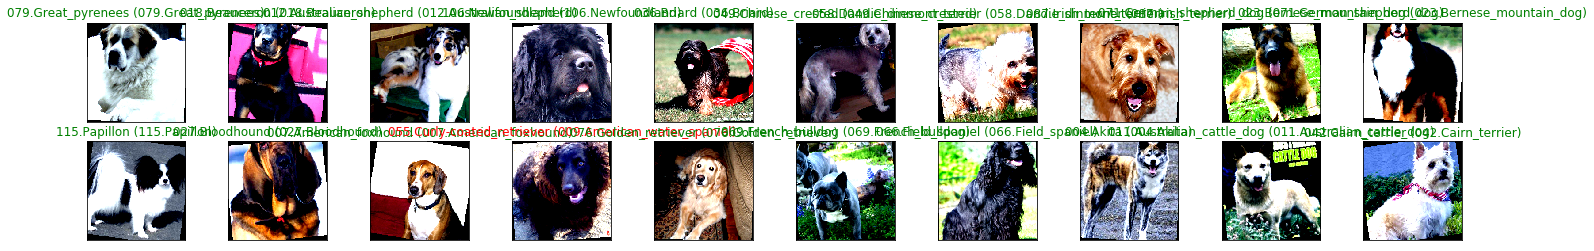

In [48]:
# compare results to training images

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image


#loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
test_loader = loaders_transfer.get('test')

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
#if train_on_gpu:
if use_cuda:
    images = images.cuda()

# get sample outputs
output = model_transfer(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
#preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())
preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)